# GROUP 21

### Student Name : Ancy Rex [Student ID : S3760058]
### Student Name : Anooja Maria Mathew [Student ID : S3767921]
### Student Name : Pooja Suresh [Student ID : S3749775]

# Predicting Customer Subscription

## Goal & Objective

The goal of our project is to predict if a customer of a Portugese Banking Institute would agree to start a term deposit with the bank, based on a campaign carried out by the bank. To acheive this goal, 5 different modelling techniques, namely, K- Nearest Neighbour, Decision Tree Algorithm, Random Forest Classifier, Logistic Regression & Support Vector Machine algorithms were used on the dataset to forecast and analyse if the marketing strategies used by the bank would prove fruitful in their efforts to get customers subscribe to their term deposit.

## Data Description 

The dataset used was sourced from the UCI Repository and consists of 20 descriptive features pertaining to the personal, social and employment details that can be useful in predicting if the customer would enrol for the term deposit.The dataset has 10 numeric features pertaining such as age of the customer, last call duration to them(in seconds), consumer confidence index etc and 10 categorical features, that are a mix of nominal and ordinal values, such as, the marital status of the customer, if the customer has a housing loan, if the customer has a credit default etc. The target feature "y" consists of 2 labels, namely "yes" and "no" indicating whether the customer has subscribed to the term deposit or not. The dataset composed out of this compaign consists of 41188 observations.

#### Source : UCI. (2019). [online] Available at: http://archive.ics.uci.edu/ml/datasets/Bank+Marketing

# Table of Contents

[Data Preparation](#Data Preparation) <br>
[Data Visualization](#Data Visualization) <br>
[Preprocessing Categorical Features](#Preprocessing the Categorical Features) <br>
[Feature Selection & Ranking](#Feature Selection & Ranking ) <br>
[Data Sampling](#Data Sampling) <br>
[Model Evaluation](#Model Evaluation) <br>
[Hyperparameter Tuning & Visualization](#Hyperparameter Tuning & Visualization) <br>
&emsp;[K - Nearest Neighbour](#KNN) <br>
&emsp;[Decision Tree](#DT) <br>
&emsp;[Logistic Regression](#LR) <br>
&emsp;[Random Forest Classifier](#RF) <br>
&emsp;[Support Vector Machine](#SVM) <br>
[Performance Comparison](#Performance) <br>
[Limitations & Proposed Solutions](#Limitations) <br>
[Summary & Conclusion](#Summary) <br>
[References](#References)

<a id="Data Preparation"></a>
# Data Preparation

## Loading the Data

The below code snippet depicts loading the dataset "bank-additional-full" and storing it as a DataFrame "Bank". The shape of the dataframe are also described.

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


Bank_csv ='s3767921_Data.csv'

%matplotlib inline

Bank = pd.read_csv(Bank_csv, sep=';',decimal ='.')

Bank.shape

(41188, 21)

Describing the shape and data types of the attributes in the dataframe

In [2]:
Bank.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

# Checking Null & Missing Values

Checking for null values in the dataframe using the isnull() function and missing values using the isna() function in pandas.

In [3]:
Bank.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [4]:
Bank.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

# Dropping irrelevant features

Features that do not aid in the predective process have been removed from the dataframe to provide more accurate results. Below is the list of dropped columns : <br>
'contact': Last communication type  <br>
'month' : last contact month of year <br>
'day_of_week' : last contact day of the week <br>
'duration' : last contact duration, in seconds <br>
'campaign' : number of contacts performed during this campaign and for a client <br>
'pdays' : number of days that passed by after a client was last contacted from a previous campaign <br>
'previous' : number of contacts performed before this campaign and for a client <br>
'cons.price.idx' : consumer price index - monthly indicator <br>
'euribor3m' : euribor 3 month rate - daily indicator <br>

In [5]:
Bank_df = Bank.drop(['contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'cons.price.idx', 'euribor3m'], axis=1)
Bank_df.head()

,age,job,marital,education,default,housing,loan,poutcome,emp.var.rate,cons.conf.idx,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,nonexistent,1.1,-36.4,5191.0,no
1,57,services,married,high.school,unknown,no,no,nonexistent,1.1,-36.4,5191.0,no
2,37,services,married,high.school,no,yes,no,nonexistent,1.1,-36.4,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,nonexistent,1.1,-36.4,5191.0,no
4,56,services,married,high.school,no,no,yes,nonexistent,1.1,-36.4,5191.0,no


<a id="Data Visualization"></a>
# Data Visualization

Visualization of the dataframe with relevant features was carried out based on 3 different categories : Visualizations with 1 feature, Visualizations with 2 features and Visualizations with 3 features.

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

## Visualization with 1 feature

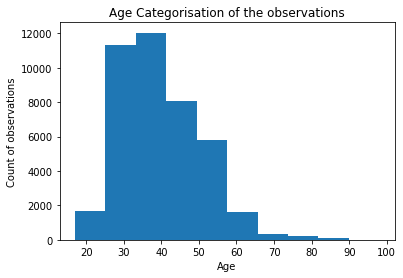

In [7]:
plt.hist(Bank_df['age'], density=False,histtype='bar',orientation='vertical') 
plt.ylabel('Count of observations')
plt.xlabel('Age');
plt.title("Age Categorisation of the observations");

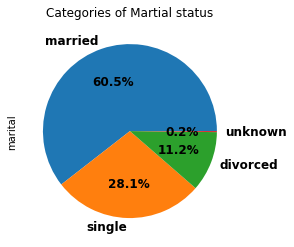

In [8]:
Bank_df['marital'].value_counts().plot(kind='pie',autopct='%1.1f%%',textprops={'fontweight':'bold','fontsize': 12},title='Categories of Martial status');

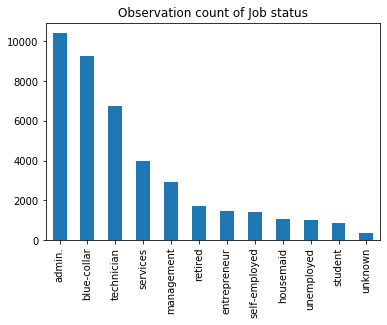

In [9]:
Bank_df['job'].value_counts().plot(kind='bar',title='Observation count of Job status');

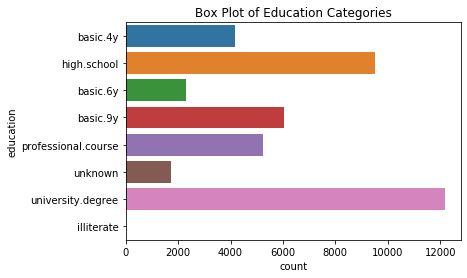

In [10]:
sns.countplot(y="education", data=Bank_df)
plt.title("Box Plot of Education Categories");
plt.show()

## Visualization with 2 features

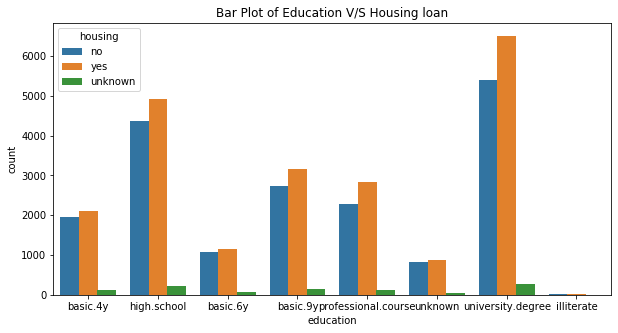

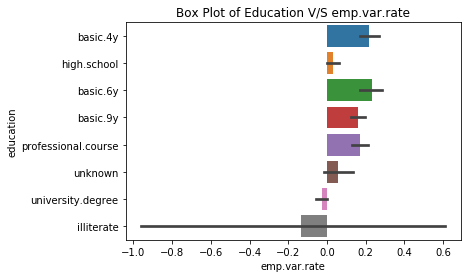

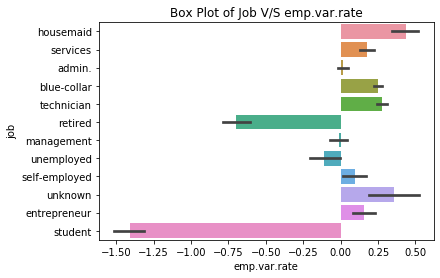

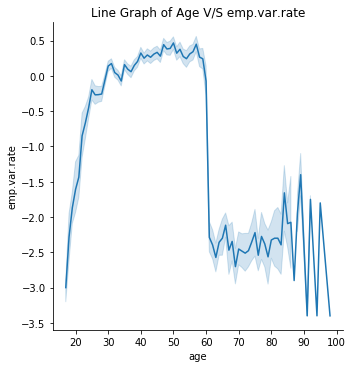

In [11]:
plt.figure(figsize=(10,5))
plt.title("Bar Plot of Education V/S Housing loan");
sns.countplot(x="education",hue="housing",data=Bank_df);
plt.show()

sns.barplot(Bank_df['emp.var.rate'],Bank_df['education'])
plt.title("Box Plot of Education V/S emp.var.rate");
plt.show()

sns.barplot(Bank_df['emp.var.rate'],Bank_df['job'])
plt.title("Box Plot of Job V/S emp.var.rate");
plt.show()

sns.relplot(x="age", y="emp.var.rate", kind="line", data=Bank_df);
plt.title("Line Graph of Age V/S emp.var.rate");
plt.show()

## Visualization with 3 features

Below is a visualization for comparison between education, age and marital status

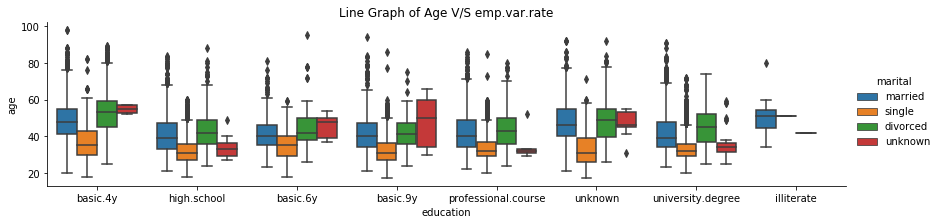

In [12]:
sns.catplot("education", "age", "marital", data=Bank_df, kind="box", saturation=0.8,height=3,aspect=4);
plt.title("Line Graph of Age V/S emp.var.rate");
plt.show();

Below is a visualization for comparison between Age, nr.employed and Loan

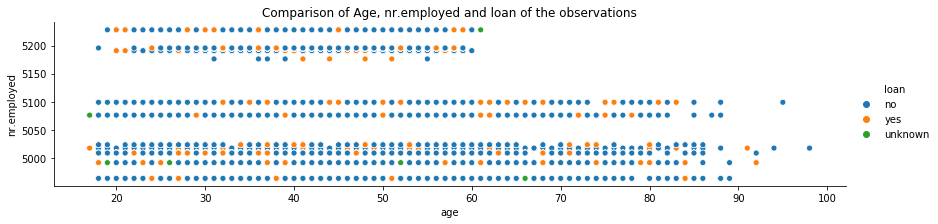

In [13]:
sns.relplot(x="age", y="nr.employed", hue="loan", data=Bank_df,height=3,aspect=4);
plt.title("Comparison of Age, nr.employed and loan of the observations");
plt.show();

Below is a visualization for comparison between Default, Housing and Loan

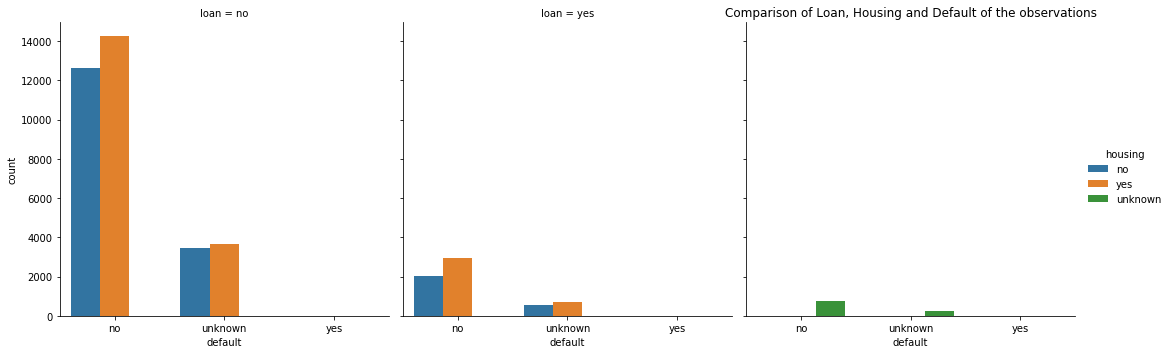

In [14]:
sns.catplot(x="default", hue="housing", col="loan",kind="count", data=Bank_df);
plt.title("Comparison of Loan, Housing and Default of the observations");
plt.show();

Below is a visualization for comparison between Age, Job and Housing

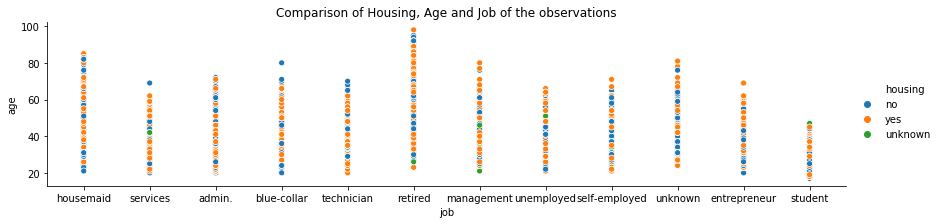

In [15]:
sns.relplot(x="job", y='age',hue="housing", data=Bank_df,height=3,aspect=4);
plt.title("Comparison of Housing, Age and Job of the observations");
plt.show();

<a id="Preprocessing the Categorical Features"></a>
# Preprocessing the Categorical Features

The below snippet describes stripping of the categorical features for any extra white spaces using the str.strip() function

In [16]:
for col in Bank_df.select_dtypes([np.object]):
    Bank_df[col] = Bank_df[col].str.strip()

## Finding unique values in the numerical and categorical features
The below code snippet is the analyse the unique values in each of the numeric features in the dataframe. This is to help identfy any unusual values present in the dataframe.

In [17]:
#finding unique values in numerical features
numericalColumn = ['age', 'emp.var.rate', 'cons.conf.idx', 'nr.employed']
for col in numericalColumn:
    print('Unique values for ' + col)
    print(Bank_df[col].unique())

Unique values for age
[56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 52 58 32 38 44
 42 60 53 47 51 48 33 31 43 36 28 27 26 22 23 20 21 61 19 18 70 66 76 67
 73 88 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91
 86 98 94 84 92 89]
Unique values for emp.var.rate
[ 1.1  1.4 -0.1 -0.2 -1.8 -2.9 -3.4 -3.  -1.7 -1.1]
Unique values for cons.conf.idx
[-36.4 -41.8 -42.7 -36.1 -40.4 -42.  -45.9 -50.  -47.1 -46.2 -40.8 -33.6
 -31.4 -29.8 -26.9 -30.1 -33.  -34.8 -34.6 -40.  -39.8 -40.3 -38.3 -37.5
 -49.5 -50.8]
Unique values for nr.employed
[5191.  5228.1 5195.8 5176.3 5099.1 5076.2 5017.5 5023.5 5008.7 4991.6
 4963.6]


The below code snippet is the analyse the unique values in each of the categorical features in the dataframe. This is to help identfy any unusual values present in the dataframe.

In [18]:
#finding unique values in categorical features before transformation
categoricalColumn = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'poutcome']
for col in categoricalColumn:
    print('Unique values for ' + col)
    print(Bank_df[col].unique())

Unique values for job
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
Unique values for marital
['married' 'single' 'divorced' 'unknown']
Unique values for education
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
Unique values for default
['no' 'unknown' 'yes']
Unique values for housing
['no' 'yes' 'unknown']
Unique values for loan
['no' 'yes' 'unknown']
Unique values for poutcome
['nonexistent' 'failure' 'success']


## Encoding the target feature

The following code snippet is to rename the feature 'y' as "target"

In [19]:
#renaming y as target
target = Bank_df['y']
Bank_df.rename(columns = {'y':'target'}, inplace = True)

print("Individual value counts of target column : ")
print(target.value_counts())

Individual value counts of target column : 
no     36548
yes     4640
Name: y, dtype: int64


The below snippet depicts replacing the 'yes' and 'no' levels with 1 and 0 respectively. This is to ensure that the best practices of Data Preprocessing are carried out.

In [20]:
#replacing values in target column
Bank_df['target'].replace('yes', 1, inplace=True)
Bank_df['target'].replace('no', 0, inplace=True)

target = Bank_df['target']

Bank_df.head()

,age,job,marital,education,default,housing,loan,poutcome,emp.var.rate,cons.conf.idx,nr.employed,target
0,56,housemaid,married,basic.4y,no,no,no,nonexistent,1.1,-36.4,5191.0,0
1,57,services,married,high.school,unknown,no,no,nonexistent,1.1,-36.4,5191.0,0
2,37,services,married,high.school,no,yes,no,nonexistent,1.1,-36.4,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,nonexistent,1.1,-36.4,5191.0,0
4,56,services,married,high.school,no,no,yes,nonexistent,1.1,-36.4,5191.0,0


## Replacing unusual values in the Categorical Features
The following code snippet describes how the unusual value of "unknown" in the categorical features is being replaced as NAN(Not A Number).

In [21]:
#replacing unknown in all categorical values with nan
Bank_df['job'].replace('unknown', np.nan, inplace=True)
Bank_df['marital'].replace('unknown', np.nan, inplace=True)
Bank_df['education'].replace('unknown', np.nan, inplace=True)
Bank_df['default'].replace('unknown', np.nan, inplace=True)
Bank_df['housing'].replace('unknown', np.nan, inplace=True)
Bank_df['loan'].replace('unknown', np.nan, inplace=True)

print("Sum of nan values dataframe after replacing unusual values in the categorical features: ")
print(Bank_df.isna().sum())

Sum of nan values dataframe after replacing unusual values in the categorical features: 
age                 0
job               330
marital            80
education        1731
default          8597
housing           990
loan              990
poutcome            0
emp.var.rate        0
cons.conf.idx       0
nr.employed         0
target              0
dtype: int64


The below snippet describes the NAN values in the categorical features being replaced by calculating the Mode of the respective feature and assigning it to the NAN.

In [22]:
#replacing nan in job with mode of column
Bank_df['job'] = Bank_df['job'].fillna(Bank_df['job'].mode()[0])

#replacing nan in marital with mode of column
Bank_df['marital'] = Bank_df['marital'].fillna(Bank_df['marital'].mode()[0])

#replacing nan in education with mode of column
Bank_df['education'] = Bank_df['education'].fillna(Bank_df['education'].mode()[0])

#replacing nan in default with mode of column
Bank_df['default'] = Bank_df['default'].fillna(Bank_df['default'].mode()[0])

#replacing nan in housing with mode of column
Bank_df['housing'] = Bank_df['housing'].fillna(Bank_df['housing'].mode()[0])

#replacing nan in loan with mode of column
Bank_df['loan'] = Bank_df['loan'].fillna(Bank_df['loan'].mode()[0])

Printing the sum of NAN values in the dataframe after replacing nan values in all the features

In [23]:
print("Sum of nan values dataframe after replacing nan values in the categorical features: ")
print(Bank_df.isna().sum())

Sum of nan values dataframe after replacing nan values in the categorical features: 
age              0
job              0
marital          0
education        0
default          0
housing          0
loan             0
poutcome         0
emp.var.rate     0
cons.conf.idx    0
nr.employed      0
target           0
dtype: int64


# Encoding of Numeric and Categorical features
## Integer Encoding of Numeric Feature 'education'
Performing Integer Encoding for the feature education. The seven levels illiterate, basic.4y, basic.6y, basic.9y, high.school, professional.course and university.degree are encoded to the corresponding levels 0, 1, 2, 3, 4, 5, 6 respectively.

In [24]:
level_mapping = {'illiterate': 0, 'basic.4y': 1, 'basic.6y': 2, 'basic.9y': 3, 'high.school': 4, 'professional.course': 5, 'university.degree': 6}

#replacing the feature education in the dataframe with the encoded, mapped values
Bank_df['education'] = Bank_df['education'].replace(level_mapping)

Bank_df.head(5)

,age,job,marital,education,default,housing,loan,poutcome,emp.var.rate,cons.conf.idx,nr.employed,target
0,56,housemaid,married,1,no,no,no,nonexistent,1.1,-36.4,5191.0,0
1,57,services,married,4,no,no,no,nonexistent,1.1,-36.4,5191.0,0
2,37,services,married,4,no,yes,no,nonexistent,1.1,-36.4,5191.0,0
3,40,admin.,married,2,no,no,no,nonexistent,1.1,-36.4,5191.0,0
4,56,services,married,4,no,no,yes,nonexistent,1.1,-36.4,5191.0,0


Checking type of the feature after integer encoding

In [25]:
Bank_df['education'].dtypes

dtype('int64')

## One - Hot Encoding of Categorical Features
The following code snippets describe how One-Hot encoding is being carried out for all the categorical features in the dataframe. The "target" feature is being dropped from the dataframe as after performing One-Hot encoding we continue to scale the dataframe. It is not desirable to scale the target feature and thus we drop it from the dataframe before the process.

In [26]:
#dropping target column before encoding
Bank_df = Bank_df.drop(['target'], axis=1)

In [27]:
# get the list of categorical descriptive features
categorical_cols = Bank_df.columns[Bank_df.dtypes==object].tolist()

# if a categorical descriptive feature has only 2 levels,
# define only one binary variable
for col in categorical_cols:
    n = len(Bank_df[col].unique())
    if (n == 2):
        Bank_df[col] = pd.get_dummies(Bank_df[col], drop_first=True)

# for other categorical features (with > 2 levels), 
# use regular one-hot-encoding 
# if a feature is numeric, it will be untouched
Bank_df = pd.get_dummies(Bank_df)

print("Dataframe after performing One-Hot encoding: ")
Bank_df.head()

Dataframe after performing One-Hot encoding: 


,age,education,default,housing,loan,emp.var.rate,cons.conf.idx,nr.employed,job_admin.,job_blue-collar,...,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,1,0,0,0,1.1,-36.4,5191.0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,57,4,0,0,0,1.1,-36.4,5191.0,0,0,...,1,0,0,0,0,1,0,0,1,0
2,37,4,0,1,0,1.1,-36.4,5191.0,0,0,...,1,0,0,0,0,1,0,0,1,0
3,40,2,0,0,0,1.1,-36.4,5191.0,1,0,...,0,0,0,0,0,1,0,0,1,0
4,56,4,0,0,1,1.1,-36.4,5191.0,0,0,...,1,0,0,0,0,1,0,0,1,0


Extracting the feature names and storing in a variable before performing scaling

In [28]:
attributeNames_new = Bank_df.columns
attributeNames_new = attributeNames_new.tolist()
attributeNames_new.append("target")

# Scaling the Dataframe
The below code snippet depicts Scaling for the dataframe. The Min-Max Scaling procedure is carried out on the dataframe, such that each feature has values ranging between 0 and 1.

In [29]:
#scaling the dataframe
from sklearn import preprocessing
import warnings
warnings.filterwarnings("ignore")

Bank_scaled_df = preprocessing.MinMaxScaler().fit_transform(Bank_df)
Bank_df_new = pd.DataFrame(data = Bank_scaled_df)
Bank_df_new.head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,0.481481,0.166667,0.0,0.0,0.0,0.9375,0.60251,0.859735,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.493827,0.666667,0.0,0.0,0.0,0.9375,0.60251,0.859735,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.246914,0.666667,0.0,1.0,0.0,0.9375,0.60251,0.859735,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.283951,0.333333,0.0,0.0,0.0,0.9375,0.60251,0.859735,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.481481,0.666667,0.0,0.0,1.0,0.9375,0.60251,0.859735,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


The target column is added back into the scaled dataframe. The below code snippet also shows creation of a clean dataframe with columns names assigned to the names prior to scaling.

In [30]:
Bank_df_new['target'] = target 

#creating a new, clean csv
Bank_clean = Bank_df_new
Bank_clean.columns = attributeNames_new

Printing shape of the dataframe

In [31]:
Bank_clean.shape

(41188, 26)

Summary of the dataframe

In [32]:
Bank_clean.describe(include='all').round(3) 

,age,education,default,housing,loan,emp.var.rate,cons.conf.idx,nr.employed,job_admin.,job_blue-collar,...,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,poutcome_failure,poutcome_nonexistent,poutcome_success,target
count,41188.000,41188.000,41188.000,41188.000,41188.000,41188.000,41188.000,41188.000,41188.000,41188.000,...,41188.000,41188.000,41188.000,41188.000,41188.000,41188.000,41188.000,41188.000,41188.000,41188.000
mean,0.284,0.706,0.000,0.548,0.152,0.725,0.431,0.769,0.261,0.225,...,0.021,0.164,0.025,0.112,0.607,0.281,0.103,0.863,0.033,0.113
std,0.129,0.274,0.009,0.498,0.359,0.327,0.194,0.273,0.439,0.417,...,0.144,0.370,0.155,0.315,0.488,0.449,0.304,0.343,0.180,0.316
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.185,0.500,0.000,0.000,0.000,0.333,0.339,0.512,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000
50%,0.259,0.667,0.000,1.000,0.000,0.938,0.377,0.860,0.000,0.000,...,0.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000
75%,0.370,1.000,0.000,1.000,0.000,1.000,0.603,1.000,1.000,0.000,...,0.000,0.000,0.000,0.000,1.000,1.000,0.000,1.000,0.000,0.000
max,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,...,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


Displaying the dataframe

In [33]:
Bank_clean.head(5)

,age,education,default,housing,loan,emp.var.rate,cons.conf.idx,nr.employed,job_admin.,job_blue-collar,...,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,poutcome_failure,poutcome_nonexistent,poutcome_success,target
0,0.481481,0.166667,0.0,0.0,0.0,0.9375,0.60251,0.859735,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0
1,0.493827,0.666667,0.0,0.0,0.0,0.9375,0.60251,0.859735,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0
2,0.246914,0.666667,0.0,1.0,0.0,0.9375,0.60251,0.859735,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0
3,0.283951,0.333333,0.0,0.0,0.0,0.9375,0.60251,0.859735,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0
4,0.481481,0.666667,0.0,0.0,1.0,0.9375,0.60251,0.859735,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0


<a id="Feature Selection & Ranking"></a>
# Feature Selection & Ranking 

The Random Forest Importance(RFI) was used to determine the most important features out of the selected relevant features from the Bank_clean dataframe. This helps in understanding which features are going to be useful for the predetive modelling and will aslso be used in the modelling phase for predictions.

In [34]:
import altair as alt

In [35]:
alt.renderers.enable('default')

RendererRegistry.enable('default')

In [36]:
from sklearn.ensemble import RandomForestClassifier

X = Bank_clean.drop('target',axis=1)
y = Bank_clean['target']

number_of_features = 10
model_rfi = RandomForestClassifier(n_estimators=100)
model_rfi.fit(X, Bank_clean['target'])
fs_indices = np.argsort(model_rfi.feature_importances_)[::-1][0:number_of_features]

best_features = Bank_clean.columns[fs_indices].values
best_features

array(['age', 'cons.conf.idx', 'education', 'nr.employed',
       'poutcome_success', 'emp.var.rate', 'housing', 'loan',
       'job_admin.', 'poutcome_failure'], dtype=object)

In [37]:
feature_importances = model_rfi.feature_importances_[fs_indices]
feature_importances

array([0.36650651, 0.1071895 , 0.09424504, 0.09173699, 0.05927491,
       0.05252811, 0.04627524, 0.03254444, 0.0145786 , 0.01289533])

The below snippet depicts a function to visualize the important features against the best features obtained from the Random Forest Importance algorithm.

In [38]:
def plot_imp(best_features, scores, method_name, color):
    
    df = pd.DataFrame({'features': best_features, 
                       'importances': scores})
    
    chart = alt.Chart(df, 
                      width=500, 
                      title=method_name + ' Feature Importances'
                     ).mark_bar(opacity=0.75, 
                                color=color).encode(
        alt.X('features', title='Feature', sort=None, axis=alt.AxisConfig(labelAngle=45)),
        alt.Y('importances', title='Importance')
    )
    
    return chart

plot_imp(best_features, feature_importances, 'Random Forest', 'teal')

alt.Chart(...)

<a id="Data Sampling"></a>
# Data Sampling

The Bank dataset consists of 41188 columns, out of which we will be using 5000 columns for modelling. The below snippet depicts randomly selecting 5000 values from the "Bank_clean" dataframe and assigning it to a new dataframe "Bank_model". The "Bank_model_target" dataframe stores the "target" feature. This sample split will be used for Decision Tree, Logistic Regression & Random Forest Classifier. The number of samples for K- Nearest Neighbour and Support Vector Machine have been reduced to 1000 to cut down on run-time of the cross validation technique.

In [39]:
n_samples = 5000

Bank_model = Bank_clean.drop(['target'], axis=1)
Bank_model= Bank_model.iloc[:,0:25].values
Bank_model_target= Bank_clean.iloc[:,[-1]].values

Bank_sample = pd.DataFrame(Bank_model).sample(n=n_samples, random_state=8).values
Bank_target_sample = pd.DataFrame(Bank_model_target).sample(n=n_samples, random_state=8).values

print(Bank_sample.shape)
print(Bank_target_sample.shape)

unique, counts = np.unique(Bank_target_sample, return_counts=True)
dict(zip(unique, counts))

(5000, 25)
(5000, 1)


{0: 4431, 1: 569}

In [40]:
Bank_target_sample.flatten()

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [41]:
Bank_sample

array([[0.39506173, 0.16666667, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.19753086, 0.83333333, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.14814815, 1.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.33333333, 0.33333333, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.30864198, 0.66666667, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.30864198, 0.33333333, 0.        , ..., 0.        , 1.        ,
        0.        ]])

<a id="Model Evaluation"></a>
# Model Evaluation

The goal of predicting customer suscription will be done using the 5 modelling algorithms:<br>K- Nearest Neighbour <br>Decision Tree <br>Logistic Regression <br>Random Forest Classifier <br>Support Vector Machine

<a id="Hyperparameter Tuning & Visualization"></a>
# Hyperparameter Tuning & Visualization
Hyperparameter tuning is specified for the different algorithms to get a detailed understanding of which technique and parameters work best for the dataset. The results are also visualized in different plots to get a better understanding.

<a id="KNN"></a>
## K- Nearest Neighbour

The K- Nearest Neighbours algorithm is tuned with parameters "n_neighbours", ranging for 1 to 10 and "p" metric, which specifies the distance metric (Euclidean, Manhattan or Minkowski). The algorithm is carried out with the scoring parameter set to "accuracy", giving us an idea of the performance of the algorithm based on the Accuracy score of the model. We define 3- fold cross validation. The below snippet depicts splitting the "Bank_model" dataframe as a 70 : 30 split, with 70% training data and 30% test data. Our dataset now consists of 3500 training observations and 1500 test observations.

This number of samples for the KNN algorithm is taken as 1000 in order to reduce the run-time of the cross-validation.

In [42]:
n_samples1 = 1000

Bank_sample1 = pd.DataFrame(Bank_model).sample(n=n_samples1, random_state=8).values
Bank_target_sample1 = pd.DataFrame(Bank_model_target).sample(n=n_samples1, random_state=8).values

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(Bank_sample1,Bank_target_sample1, test_size = 0.30, random_state = 8);

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RepeatedStratifiedKFold, GridSearchCV

parameters_KNN = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 
              'p': [1, 2, 5]}

cv_method = RepeatedStratifiedKFold(n_splits=3,  
                                    random_state=8)

grid_KNN = GridSearchCV(estimator=KNeighborsClassifier(), 
                      param_grid=parameters_KNN, 
                      cv=cv_method,
                      verbose=1,  # verbose: the higher, the more messages
                      scoring='accuracy', 
                      return_train_score=True)

grid_KNN.fit(X_train, Y_train.ravel());

Fitting 30 folds for each of 30 candidates, totalling 900 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 900 out of 900 | elapsed:  1.9min finished


In [43]:
grid_KNN.best_params_

{'n_neighbors': 7, 'p': 1}

In [44]:
grid_KNN.best_score_

0.9191451768704986

In [45]:
grid_KNN.cv_results_['mean_test_score']

array([0.88314442, 0.87785848, 0.87657215, 0.91329249, 0.91143331,
       0.9098633 , 0.91229045, 0.90842901, 0.90757431, 0.91543169,
       0.91271719, 0.91357495, 0.91885967, 0.91371434, 0.91328577,
       0.91700598, 0.91442965, 0.9135725 , 0.91914518, 0.91514312,
       0.91299842, 0.91571904, 0.91171821, 0.91043126, 0.91514618,
       0.91186249, 0.90928922, 0.91171821, 0.9062892 , 0.90557512])

In [46]:
results_KNN = pd.DataFrame(grid_KNN.cv_results_['params'])
results_KNN['test_score'] = grid_KNN.cv_results_['mean_test_score']
results_KNN['metric'] = results_KNN['p'].replace([1,2,5], ["Manhattan", "Euclidean", "Minkowski"])
results_KNN.head()

,n_neighbors,p,test_score,metric
0,1,1,0.883144,Manhattan
1,1,2,0.877858,Euclidean
2,1,5,0.876572,Minkowski
3,2,1,0.913292,Manhattan
4,2,2,0.911433,Euclidean


From the results of the tuned KNN model, we observe an accuracy score of 0.92, with the best results coming from 7 neighbours and distance metric p = 1, which is the Manhattan Distance. The results of the test are stored in a dataframe "results_KNN", with features including number of neighbours, the distance metric(p) value and the test scores obtained. 

Below is the visualization of the "results_KNN" dataframe, plotted with the number of neighbours on the x-axis and the test scores on the y-axis.

In [47]:
alt.Chart(results_KNN, 
          title='KNN Performance Comparison'
         ).mark_line(point=True).encode(
    alt.X('n_neighbors', title='Number of Neighbors'),
    alt.Y('test_score', title='Mean CV Score', scale=alt.Scale(zero=False)),
    color='metric'
)

alt.Chart(...)

<a id="DT"></a>
## Decision Tree 

The Decision algorithm is tuned with critirion "gini and "entropy", Maximum Depth (max_depth) ranging from 1 to 11 and Minimum Sample Split (min_samples_split) between 2 and 3. The algorithm is carried out with the scoring parameter set to "accuracy", giving us an idea of the performance of the algorithm based on the Accuracy score of the model.

In [48]:
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, Y_train, Y_test = train_test_split(Bank_sample,Bank_target_sample, test_size = 0.30, random_state = 0);

df_classifier = DecisionTreeClassifier(random_state=0)

params_DT = {'criterion': ['gini', 'entropy'],
             'max_depth': [1, 2, 3, 4, 5, 6, 7, 8,9,10,11],
             'min_samples_split': [2, 3]}

grid_DT = GridSearchCV(estimator=df_classifier, 
                     param_grid=params_DT, 
                     cv=cv_method,
                     verbose=1, 
                     scoring='accuracy')

grid_DT.fit(X_train, Y_train);


Fitting 30 folds for each of 44 candidates, totalling 1320 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1320 out of 1320 | elapsed:   15.0s finished


In [49]:
grid_DT.best_params_

{'criterion': 'entropy', 'max_depth': 3, 'min_samples_split': 2}

In [50]:
grid_DT.best_score_

0.8868003407994676

From the results of the tuned Decision Tree model, we observe an accuracy score of 0.88, with the best results coming from criterion "gini", maximum depth of 3 and minimum samples split of 2. The results of the test are stored in a dataframe "results_DT", with features including criterion, maximum depth, minimum samples split and the corressponding test scores obtained. 

Below is the visualization of the "results_DT" dataframe, plotted with the maximum depth on the x-axis and the test scores on the y-axis.

In [51]:
results_DT = pd.DataFrame(grid_DT.cv_results_['params'])
results_DT['test_score'] = grid_DT.cv_results_['mean_test_score']
results_DT.head()

,criterion,max_depth,min_samples_split,test_score
0,gini,1,2,0.880286
1,gini,1,3,0.880286
2,gini,2,2,0.885428
3,gini,2,3,0.885428
4,gini,3,2,0.886457


In [52]:
alt.Chart(results_DT, 
          title='DT Performance Comparison'
         ).mark_line(point=True).encode(
    alt.X('max_depth', title='Maximum Depth'),
    alt.Y('test_score', title='Mean CV Score', aggregate='average', scale=alt.Scale(zero=False)),
    color='criterion'
)

alt.Chart(...)

<a id="LR"></a>
## Logistic Regression

In Logistic Regression we are using 5000 samples. The Bank_sample and Bank_target_sample are the dataset that will be used for training and testing the data.

In [53]:
n_samples = 5000

Bank_model = Bank_clean.drop(['target'], axis=1)
Bank_model= Bank_model.iloc[:,0:25].values
Bank_model_target= Bank_clean.iloc[:,[-1]].values

Bank_sample = pd.DataFrame(Bank_model).sample(n=n_samples, random_state=8)
Bank_target_sample = pd.DataFrame(Bank_model_target).sample(n=n_samples, random_state=8)

print(Bank_sample.shape)
print(Bank_target_sample.shape)

unique, counts = np.unique(Bank_target_sample, return_counts=True)
dict(zip(unique, counts))

(5000, 25)
(5000, 1)


{0: 4431, 1: 569}

The Bank_model_target dataset

In [54]:
Bank_model_target.flatten()

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

The Bank_model dataset

In [55]:
Bank_model

array([[0.48148148, 0.16666667, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.49382716, 0.66666667, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.24691358, 0.66666667, 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.48148148, 1.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.33333333, 0.83333333, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.7037037 , 0.83333333, 0.        , ..., 1.        , 0.        ,
        0.        ]])

In logistic regression we have divided the descriptive features and the target feature into a training set and a test set by a ratio of 70:30. 70 % of the data to build a classifier and evaluate its performance on the test set was used. We have used 101 random samples for this fitting.

In [56]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(Bank_sample, Bank_target_sample, test_size = 0.30, random_state=101);

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
import statsmodels.api as sm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [58]:
import warnings
warnings.filterwarnings("ignore")

lr = LogisticRegression(random_state=101)
lr.fit(X_train,Y_train)
Y_pred = lr.predict(X_test)

The metrics 
1. Accuracy
2. Precision
3. Recall
4. F1 Score (the harmonic average of precision and recall)
5. Confusion Matrix
were considered to evaluate models which were based on the test set:

In [59]:
print("\nClassification report for Logistic Regression") 
print('Report:\n',classification_report(Y_test, Y_pred))
print("F1 Score:",f1_score(Y_pred,Y_test))
print('confusion Matrix:\n',confusion_matrix(Y_pred,Y_test))
print('cross validation:',cross_val_score(lr, X, y, cv=5))


Classification report for Logistic Regression
Report:
               precision    recall  f1-score   support

           0       0.90      0.99      0.94      1319
           1       0.73      0.18      0.29       181

    accuracy                           0.89      1500
   macro avg       0.82      0.59      0.62      1500
weighted avg       0.88      0.89      0.86      1500

F1 Score: 0.2920353982300885
confusion Matrix:
 [[1307  148]
 [  12   33]]
cross validation: [0.8873513  0.8873513  0.88820102 0.88940148 0.66771883]


The confusion matrix for Logistic Regression without RFE was shown in the report with F1 score of 0.29 

The 10 most important features were used to train and fit the model. Assuming to obtain a better precision and accuracy. Fitting was done using the 10 best features with the 101 random samples.

In [60]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.feature_selection import RFE
rfe = RFE(lr, 10)
rfe.fit(X_train,Y_train)

RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                 fit_intercept=True, intercept_scaling=1,
                                 l1_ratio=None, max_iter=100,
                                 multi_class='auto', n_jobs=None, penalty='l2',
                                 random_state=101, solver='lbfgs', tol=0.0001,
                                 verbose=0, warm_start=False),
    n_features_to_select=10, step=1, verbose=0)

In [61]:
#print(X_train.columns[rfe.support_])
import warnings
warnings.filterwarnings("ignore")

cols = X_train.columns[rfe.support_]
lr.fit(X_train[cols],Y_train)
Y_pred2 = lr.predict(X_test[cols])

In [62]:
def logReggResult():
    print("F1 Score:",f1_score(Y_pred2,Y_test))
    print('AUC score:',roc_auc_score(Y_test,Y_pred2))
    print('confusion Matrix:\n',confusion_matrix(Y_pred2,Y_test))
    print('kfold cross validation:\n',cross_val_score(lr, X, y, cv=5))
    print("Acurracy :",accuracy_score(Y_pred2,Y_test))


In [63]:
logReggResult()

F1 Score: 0.2857142857142857
AUC score: 0.5842279644297748
confusion Matrix:
 [[1308  149]
 [  11   32]]
kfold cross validation:
 [0.8873513  0.8873513  0.88820102 0.88940148 0.66771883]
Acurracy : 0.8933333333333333


By using Logistic Regression using RFE we have found the accuracy of the model to be 0.89. The confusion matrix have not changed much when compared to the model without using RFE.

Tuning of any critical parameters is not necessary when it comes to logistic regression.

Convergence with different solvers are used with values ‘newton-cg’, ‘lbfgs’, ‘liblinear’. Penalty used for tuning Logistic Regression is l2.

The C parameter used are 100, 10, 1.0, 0.1, 0.01 which is effective and helps to controls the penality strength.

In [64]:
from sklearn.model_selection import RepeatedStratifiedKFold


# define models and parameters
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=100)
grid_search_LR = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result_LR = grid_search_LR.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result_LR.best_score_, grid_result_LR.best_params_))
means = grid_result_LR.cv_results_['mean_test_score']
stds = grid_result_LR.cv_results_['std_test_score']
params = grid_result_LR.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.898951 using {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}
0.898360 (0.002355) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.898352 (0.002353) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.898360 (0.002355) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.898352 (0.002363) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.898352 (0.002363) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.898352 (0.002363) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.898377 (0.002350) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.898377 (0.002350) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.898377 (0.002350) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.898538 (0.002314) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.898538 (0.002314) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.898538 (0.002314) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.898943 (0.002031) wi

The result was made into a dataframe to be accesssed easily and thus taking the column values for plotting a graph.

In [65]:
results_LR = pd.DataFrame(grid_result_LR.cv_results_['params'])

In [66]:
results_LR['test_score'] = grid_result_LR.cv_results_['mean_test_score']

In [67]:
results_LR.columns

Index(['C', 'penalty', 'solver', 'test_score'], dtype='object')

In [68]:
import altair as alt

alt.Chart(results_LR, 
          title='LR Performance Comparison'
         ).mark_line(point=True).encode(
    alt.X('C', title='C values'),
    alt.Y('test_score', title='Mean Score', scale=alt.Scale(zero=False)),
    color='solver'
)

alt.Chart(...)

<a id="RF"></a>
## Random Forest Classifier

Random Forest algorithm was also implemented using 5000 samples. The Bank_sample and Bank_target_sample are the dataset that will be used for training and testing the data.

In [69]:
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings("ignore")
rfc_value = RandomForestClassifier(n_estimators=50,max_depth=5, random_state=100,max_leaf_nodes=50)
rfc_value.fit(X_train,Y_train)
Y_pred1 = rfc_value.predict(X_test)

The X_train columns were taken as the feature names and target was considered to be the class name . Using precision as 2 we have constructed a tree image for random forest model.

In [70]:
from sklearn.tree import export_graphviz
estimator = rfc_value.estimators_[5]
# Export as dot file
export_graphviz(estimator, 
                out_file='tree1.dot', 
                feature_names = X_train.columns,
                class_names = 'target',
                rounded = True, proportion = False, 
                precision = 2, filled = True)

In [71]:
def RF():
    print('Report:\n',classification_report(Y_test, Y_pred1))
    print("F1 Score:",f1_score(Y_pred1,Y_test))
    print('confusion Matrix:\n',confusion_matrix(Y_pred1,Y_test))
    print('cross validation:',cross_val_score(rfc_value, X, y, cv=5))
    print('AUC score:',roc_auc_score(Y_test,Y_pred))
    print("Acurracy :::>",accuracy_score(Y_pred,Y_test))
    


In [72]:
RF()

Report:
               precision    recall  f1-score   support

           0       0.90      0.99      0.94      1319
           1       0.79      0.17      0.28       181

    accuracy                           0.89      1500
   macro avg       0.85      0.58      0.61      1500
weighted avg       0.88      0.89      0.86      1500

F1 Score: 0.2818181818181818
confusion Matrix:
 [[1311  150]
 [   8   31]]
cross validation: [0.8873513  0.8873513  0.8873513  0.47796528 0.65873498]
AUC score: 0.5866113203121401
Acurracy :::> 0.8933333333333333


The random forest model gives us an accuracy of 0.89 with F1-score of 0.30. We have also obtained a confusion matrix. Compared to that of Logistic Regression confusion matrix, random forest tends to give better metrics values.

Max feature is the most important parameter where we have given the values sqrt,log2 values. Integer values such as 1 to 20 or 1 to 1/2 input features. The other parameter for random forest is n_estimators with values such as 10,100,1000. Even if the values are increased no further improvement will be seen in the model.

In [73]:
model = RandomForestClassifier()
n_estimators = [10, 100, 1000]
max_features = ['sqrt', 'log2']
# define grid search
grid = dict(n_estimators=n_estimators,max_features=max_features)
cv = RepeatedStratifiedKFold(n_splits=3, random_state=8)
grid_search_RF = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result_RF = grid_search_RF.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result_RF.best_score_, grid_result_RF.best_params_))
means = grid_result_RF.cv_results_['mean_test_score']
stds = grid_result_RF.cv_results_['std_test_score']
params = grid_result_RF.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.879399 using {'max_features': 'sqrt', 'n_estimators': 1000}
0.875889 (0.001672) with: {'max_features': 'sqrt', 'n_estimators': 10}
0.878251 (0.001561) with: {'max_features': 'sqrt', 'n_estimators': 100}
0.879399 (0.001781) with: {'max_features': 'sqrt', 'n_estimators': 1000}
0.876163 (0.002298) with: {'max_features': 'log2', 'n_estimators': 10}
0.877926 (0.001662) with: {'max_features': 'log2', 'n_estimators': 100}
0.878894 (0.001596) with: {'max_features': 'log2', 'n_estimators': 1000}


It was made into a dataframe to be accesssed easily and thus taking the column values for plotting a graph.

In [74]:
results_RF = pd.DataFrame(grid_result_RF.cv_results_['params'])

In [75]:
results_RF['test_score'] = grid_result_RF.cv_results_['mean_test_score']

In [76]:
results_RF.columns

Index(['max_features', 'n_estimators', 'test_score'], dtype='object')

<a id="SVM"></a>
## Support Vector Machine

The Support Vector Algorithm is tuned with parameters "kernal" and "C". We define 2- fold cross validation. The below snippet depicts splitting the "Bank_model" dataframe as a 70 : 30 split, with 70% training data and 30% test data. Our dataset now consists of 750 training observations and 250 test observations.

This number of samples for the SVM algorithm is taken as 1000 in order to reduce the run-time of the cross-validation.

In [78]:
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold, GridSearchCV, RepeatedStratifiedKFold
from sklearn.metrics import classification_report

In [79]:
tuned_parameters = [{'kernel': ['rbf'], 'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

In [80]:
n_samples1 = 1000

Bank_sample1 = pd.DataFrame(Bank_model).sample(n=n_samples1, random_state=8).values
Bank_target_sample1 = pd.DataFrame(Bank_model_target).sample(n=n_samples1, random_state=8).values

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(Bank_sample1,Bank_target_sample1, test_size = 0.30, random_state = 8);


In [81]:
cv = RepeatedStratifiedKFold(n_splits=3, random_state=8)
clf = GridSearchCV(svm.SVC(), tuned_parameters, scoring='roc_auc')
clf.fit(X_train, Y_train)
print("Classification report:")
print()
y_true, y_pred = Y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))
print()

Classification report:

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       261
           1       0.47      0.21      0.29        39

    accuracy                           0.87       300
   macro avg       0.68      0.59      0.61       300
weighted avg       0.84      0.87      0.84       300




In [82]:
clf.best_params_

{'C': 1000, 'kernel': 'linear'}

In [83]:
def get_search_results(gs):

    def model_result(scores, params):
        scores = {'mean_score': np.mean(scores),
             'std_score': np.std(scores),
             'min_score': np.min(scores),
             'max_score': np.max(scores)}
        return pd.Series({**params,**scores})

    models = []
    scores = []

    for i in range(gs.n_splits_):
        key = f"split{i}_test_score"
        r = gs.cv_results_[key]        
        scores.append(r.reshape(-1,1))

    all_scores = np.hstack(scores)
    for p, s in zip(gs.cv_results_['params'], all_scores):
        models.append((model_result(s, p)))

    pipe_results = pd.concat(models, axis=1).T.sort_values(['mean_score'], ascending=False)

    columns_first = ['mean_score', 'std_score', 'max_score', 'min_score']
    columns = columns_first + [c for c in pipe_results.columns if c not in columns_first]

    return pipe_results[columns]

In [86]:
results_SVM= get_search_results(clf)
results_SVM.head()

,mean_score,std_score,max_score,min_score,C,kernel
7,0.864673,0.0667609,0.956916,0.769841,1000,linear
0,0.82772,0.0862856,0.939909,0.701393,1,rbf
1,0.816222,0.0832167,0.929138,0.705027,10,rbf
4,0.813413,0.0657152,0.899455,0.710478,1,linear
5,0.806098,0.0531334,0.87765,0.728044,10,linear


From the results of the tuned SVM model, we observe an accuracy score of 0.86, with the best results coming from C=1000 and for kernel linear. The results of the test are stored in a dataframe "results_SVM", with features including number of C and kernal along with the test scores obtained.

<a id="Performance"></a>
# Performance Comparison

The performance of the best models from all the 5 different algorithm were compared to get the best models out of them. However, as the dataset was biased, we have taken into consideration the AUC score to shortlist the best model. Below are results obtained from teh algorithms:
KNN - 0.58
Decision Tree - 0.48
Logistic Regression - 0.73
Random Forest Classifier - 0.71
SVM - 0.86 

In [87]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold, GridSearchCV

crossval_method_ttest = StratifiedKFold(n_splits=3, random_state=8)

crossval_results_KNN = cross_val_score(estimator=grid_KNN.best_estimator_,
                                 X=X_test,
                                 y=Y_test, 
                                 cv=crossval_method_ttest, 
                                 n_jobs=-2,
                                 scoring='roc_auc')
crossval_results_KNN.mean()

0.5794282346006484

In [88]:
crossval_results_DT = cross_val_score(estimator=grid_DT.best_estimator_,
                                X=X_test,
                                y=Y_test, 
                                cv=crossval_method_ttest, 
                                n_jobs=-2,
                                scoring='roc_auc')
crossval_results_DT.mean()

0.4804008252284115

In [89]:
cv_results_LR = cross_val_score(estimator=model,
                                X=Bank_sample,
                                y=Bank_target_sample, 
                                cv=cv, 
                                n_jobs=-1,
                                scoring='roc_auc')
cv_results_LR.mean()

0.732581596924682

In [90]:
cv_results_RF = cross_val_score(estimator=estimator,
                                X=Bank_sample,
                                y=Bank_target_sample, 
                                cv=cv, 
                                n_jobs=-1,
                                scoring='roc_auc')
cv_results_RF.mean()

0.7140361891086452

In [91]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import cross_val_score

cv_method_ttest = StratifiedKFold(n_splits=3, random_state=8)

cv_results_SVM = cross_val_score(estimator=clf.best_estimator_,
                                 X=X_train,
                                 y=Y_train, 
                                 cv=cv_method_ttest, 
                                 n_jobs=-2,
                                 scoring='roc_auc')
cv_results_SVM.mean()

0.8594059282293364

<a id="Limitations"></a>
# Limitations & Proposed Solutions

While accuracy is always considered to best factor while choosing a model, in this case, it will not be an ideal parameter in deciding the model. The reason for this is the bias in the dataset. The observations which will not subscribe to the plan are considerably more as compared to the observations which have a chance of subscribing. Due to this, the models will always predict the non subscribing observations better than the ones which have chances of subscribing. If we look at it from the perspective of profits that will impact the bank, we can conclude that the bank will be more interested in the ones that have chances of subscribing rather than the ones that might not be interested in taking the plan. Thus, AUC values will be given a high priority than the accuracy.<br>

Thus, although the best model was decided according to values obtained, an ideal scenario would be to have an unbiased dataset to obtain better datasets.

<a id="Summary"></a>
# Summary & Conclusion

Based on the above discussion, we can conclude that the SVM model with parameters C=1000 and kernal=linear is the best suitable model for this dataset. The precision and recall values obtained for this model are .84 and .87.
As mentioned above, if the dataset was not biased with more number of 'No' values, a better prediction from each of the models could have been achieved.

<a id="References"></a>
# References

1. Data Preparation for Machine Learning | www.featureranking.com. www.featureranking.com. (2020). Retrieved from https://www.featureranking.com/tutorials/machine-learning-tutorials/data-preparation-for-machine-learning/#2.3.
2. SK Part 2: Feature Selection and Ranking | www.featureranking.com. www.featureranking.com. (2020). Retrieved from https://www.featureranking.com/tutorials/machine-learning-tutorials/sk-part-2-feature-selection-and-ranking/#Feature-Selection-Using-Random-Forest-Importance.
3. SK Part 3: Cross-Validation and Hyperparameter Tuning | www.featureranking.com. www.featureranking.com. (2020). Retrieved from https://www.featureranking.com/tutorials/machine-learning-tutorials/sk-part-3-cross-validation-and-hyperparameter-tuning/#KNN-Hyperparameter-Tuning-and-Visualization-.
4. SK Part 5: Advanced Topics: Pipelines, Statistical Model Comparison, and Model Deployment | www.featureranking.com. www.featureranking.com. (2020). Retrieved from https://www.featureranking.com/tutorials/machine-learning-tutorials/sk-part-5-advanced-topics-pipelines-statistical-model-comparison-and-model-deployment/.
5. Case Study: Predicting Income Status | www.featureranking.com. www.featureranking.com. (2020). Retrieved from https://www.featureranking.com/tutorials/machine-learning-tutorials/case-study-predicting-income-status/#5.
6. markdown?, H., Verma, A., & Marcelino, P. (2020). How to reference a IPython notebook cell in markdown?. Stack Overflow. Retrieved from https://stackoverflow.com/questions/28080066/how-to-reference-a-ipython-notebook-cell-in-markdown.
7. Brownlee, J. (2020). Tune Hyperparameters for Classification Machine Learning Algorithms. Machine Learning Mastery. Retrieved from https://machinelearningmastery.com/hyperparameters-for-classification-machine-learning-algorithms/.
8. seaborn.pairplot — seaborn 0.10.1 documentation. Seaborn.pydata.org. (2020). Retrieved from https://seaborn.pydata.org/generated/seaborn.pairplot.html.
9. Setting figure size using seaborn and matplotlib — Drawing from Data. Drawing from Data. (2020). Retrieved from https://www.drawingfromdata.com/setting-figure-size-using-seaborn-and-matplotlib.
10. Visualizing statistical relationships — seaborn 0.10.1 documentation. Seaborn.pydata.org. (2020). Retrieved from https://seaborn.pydata.org/tutorial/relational.html.
11. Plotly Express Arguments. Plotly.com. (2020). Retrieved from https://plotly.com/python/px-arguments/.
12. Line Charts. Plotly.com. (2020). Retrieved from https://plotly.com/python/line-charts/.
13. sklearn.svm.SVC — scikit-learn 0.23.1 documentation. Scikit-learn.org. (2020). Retrieved from https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC.
14. SVM Hyper-parameter Tuning using GridSearchCV. Medium. (2020). Retrieved from https://towardsdatascience.com/svm-hyper-parameter-tuning-using-gridsearchcv-49c0bc55ce29.